In [1]:
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns

In [2]:
conn = sqlite3.connect('data/datalab.sqlite')
db = conn.cursor()
query = f"""
SELECT *
FROM "data.gouv.fr.2022.clean"
"""

data = pd.read_sql_query(query, conn)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285444 entries, 0 to 285443
Data columns (total 32 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   uid                              285444 non-null  object 
 1   id                               285444 non-null  object 
 2   nature                           285444 non-null  object 
 3   acheteur_id                      285444 non-null  object 
 4   acheteur_nom                     285252 non-null  object 
 5   acheteur_siren                   285274 non-null  object 
 6   titulaire_id                     285444 non-null  object 
 7   titulaire_typeIdentifiant        285444 non-null  object 
 8   objet                            285444 non-null  object 
 9   montant                          285444 non-null  float64
 10  codeCPV                          285444 non-null  object 
 11  procedure                        285444 non-null  object 
 12  du

In [63]:
data.loc[6:9,['montant', 'acheteur_nom', 'titulaire_nom', 'codeCPV', 'objet', 'dureeMois', 'procedure', 'ccag']]

,montant,acheteur_nom,titulaire_nom,codeCPV,objet,dureeMois,procedure,ccag
6,400000.00,COMMUNE DE BRUNOY,HERSAND-DELAISY KARGO,39830000-9,FOURNITURE DE PRODUITS ET MATERIELS D ENTRETIEN,48.0,Appel d'offres ouvert,Fournitures courantes et services
7,49500.00,BORDEAUX METROPOLE,MR BOT,71800000,Mise à disposition d'un outil d'animation ludi...,24.0,Marché passé sans publicité ni mise en concurr...,Fournitures courantes et services
8,165100.00,CC DES HAUTS DU PERCHE,SIGMA INGENIERIE,71000000-8,Maîtrise d'Oeuvre Réhabilitation Restaurant sc...,36.0,Procédure adaptée,Pas de CCAG
9,174252.99,CC TOURAINE VALLEE DE L'INDRE,VAL BTP,45232411-6,2024-010 -AEP - Renouvellement des réseaux d?A...,4.0,Procédure adaptée,Travaux


In [68]:
import os

csv_path = os.path.join(os.getcwd(), 'codeCPV.csv')
csv_path




'/home/ronan/code/RonanB400/Project/decp_ml/codeCPV.csv'

In [69]:
data['codeCPV'].value_counts().to_csv(csv_path)

In [71]:
data[data['codeCPV'].str.len() < 6]

,uid,id,nature,acheteur_id,acheteur_nom,acheteur_siren,titulaire_id,titulaire_typeIdentifiant,objet,montant,...,tauxAvance,origineUE,origineFrance,lieuExecution_code,lieuExecution_typeCode,idAccordCadre,source_open_data,titulaire_typeIdentifiant_right,titulaire_siren,titulaire_nom


Text(0.5, 1.0, 'Distribution des montants')

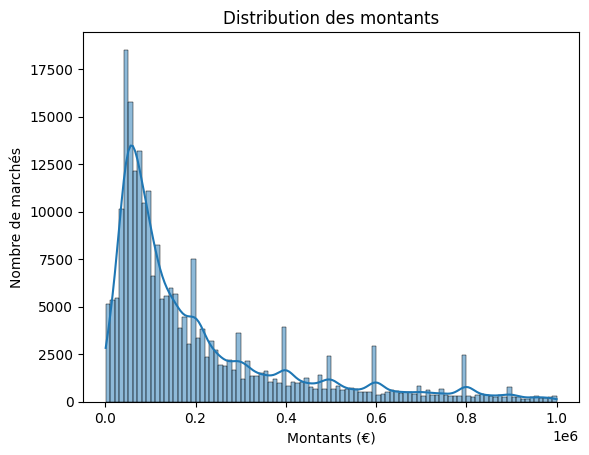

In [ ]:

# Filtrage des extrêmes (ex : garder entre 1 000 € et 10 M€)
filtered_data = data[(data["montant"] > 1_000) & (data["montant"] < 10**6)]

ax = sns.histplot(data=filtered_data, x='montant', kde=True, bins=100)
#ax.set_xscale("log")
#ax.set_xlim(10**3,10**5)
ax.set_xlabel('Montants (€)')
ax.set_ylabel('Nombre de marchés')
ax.set_title("Distribution des montants")



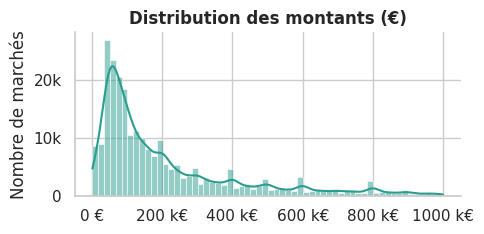

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

# Filtrage des extrêmes
filtered_data = data[(data["montant"] > 1_000) & (data["montant"] < 1_000_000)]

# Set style
sns.set_theme(style="whitegrid")

# Create figure
plt.figure(figsize=(5, 2.5))
ax = sns.histplot(data=filtered_data, x='montant', kde=True, bins=60, color="#2a9d8f", edgecolor="white")

# Format axes
#ax.set_xlabel("Montants (€)")
ax.xaxis.label.set_visible(False)
ax.set_ylabel("Nombre de marchés")
ax.set_title("Distribution des montants (€)", weight='bold')

# Optional: format x-axis in thousands
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x/1000)} k€' if x >= 1000 else f'{int(x)} €'))
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x/1000)}k' if x >= 1000 else f'{int(x)}'))


# Optional: remove top and right borders
sns.despine()

# Optional: tight layout for slides
plt.tight_layout()

# Save as high-quality image
plt.savefig("distribution_montants.png", dpi=300)

plt.show()

In [ ]:
data[data['ccag'].isna() == True].head()

,uid,id,nature,acheteur_id,acheteur_nom,acheteur_siren,titulaire_id,titulaire_typeIdentifiant,objet,montant,...,tauxAvance,origineUE,origineFrance,lieuExecution_code,lieuExecution_typeCode,idAccordCadre,source_open_data,titulaire_typeIdentifiant_right,titulaire_siren,titulaire_nom


In [8]:
data[data['ccag'].isna() == True].head()

,uid,id,nature,acheteur_id,acheteur_nom,acheteur_siren,titulaire_id,titulaire_typeIdentifiant,objet,montant,...,tauxAvance,origineUE,origineFrance,lieuExecution_code,lieuExecution_typeCode,idAccordCadre,source_open_data,titulaire_typeIdentifiant_right,titulaire_siren,titulaire_nom


In [ ]:
data[data['ccag'].isna() == True].head()

,uid,id,nature,acheteur_id,acheteur_nom,acheteur_siren,titulaire_id,titulaire_typeIdentifiant,objet,montant,...,tauxAvance,origineUE,origineFrance,lieuExecution_code,lieuExecution_typeCode,idAccordCadre,source_open_data,titulaire_typeIdentifiant_right,titulaire_siren,titulaire_nom


In [ ]:
data[data['ccag'].isna() == True].head()

,uid,id,nature,acheteur_id,acheteur_nom,acheteur_siren,titulaire_id,titulaire_typeIdentifiant,objet,montant,...,tauxAvance,origineUE,origineFrance,lieuExecution_code,lieuExecution_typeCode,idAccordCadre,source_open_data,titulaire_typeIdentifiant_right,titulaire_siren,titulaire_nom


In [4]:
cpv_df = data['codeCPV'].value_counts().sort_values(ascending=False)
cpv_df.head(10)

codeCPV
45000000-7    7828
71000000-8    5423
45210000      3543
71300000-1    3524
45210000-2    3412
45421000-4    3326
71200000-0    3176
71240000-2    3123
71241000-9    3039
45112500-0    2831
Name: count, dtype: int64

In [6]:
cpv_df.head(10).sum()

39225

(0.0, 60.0)

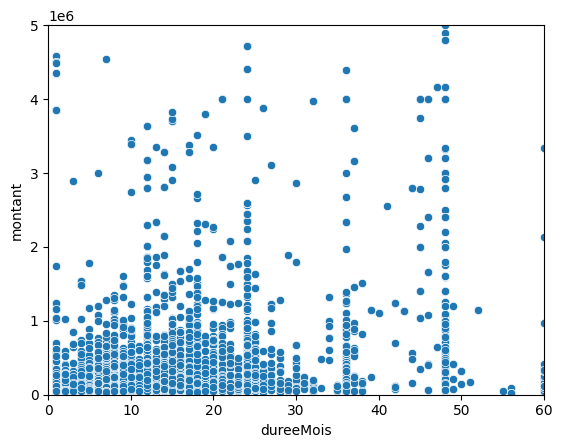

In [5]:
df = data[data['codeCPV'] == '45000000-7']

ax = sns.scatterplot(data=df,x='dureeMois', y='montant')
ax.set_ylim(0,5_000_000)
ax.set_xlim(0,60)


In [ ]:
years = data['dateNotification'].str[:4]
years.value_counts()

In [ ]:
data.info()

In [ ]:
data['ccag']

In [ ]:
data.describe()

In [ ]:
data['montant'].sum()/10**9

In [ ]:
data.head()

In [ ]:
query = f"""
SELECT *
FROM marches
"""

data_market = pd.read_sql_query(query, conn)
data_market.info()

In [6]:
conn = sqlite3.connect('data/decp.sqlite')
db = conn.cursor()
query = f"""
SELECT *
FROM decp
"""

decp_df = pd.read_sql_query(query, conn)
decp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934942 entries, 0 to 934941
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   id                             934900 non-null  object 
 1   uid                            934900 non-null  object 
 2   acheteur.id                    934879 non-null  object 
 3   nature                         932926 non-null  object 
 4   objet                          934900 non-null  object 
 5   codeCPV                        932300 non-null  object 
 6   procedure                      908839 non-null  object 
 7   lieuExecution.code             934830 non-null  object 
 8   lieuExecution.typeCode         934876 non-null  object 
 9   lieuExecution.nom              932097 non-null  object 
 10  dureeMois                      934900 non-null  float64
 11  dateNotification               934900 non-null  object 
 12  datePublicationDonnees        

In [7]:
decp_df[decp_df['codeCPV'].isna() == True].head()

,id,uid,acheteur.id,nature,objet,codeCPV,procedure,lieuExecution.code,lieuExecution.typeCode,lieuExecution.nom,...,montant,formePrix,titulaire.id,titulaire.typeIdentifiant,titulaire.denominationSociale,objetModification,source,donneesActuelles,anomalies,acheteur.nom
22572,20212021S1632900,1800050190004720212021S1632900,18000501900047,Marché,Prestations de revégétalisation de sites de l’...,None,Procédure adaptée,GF,CODE DEPARTEMENT,(973) Guyane Française,...,27605.00,Ferme et actualisable,81955673900012,SIRET,L' AGRO FORESTIERE,None,data.gouv.fr_aife,None,None,CONSERVATOIRE DE L'ESPACE LITTORAL ET DES RIVA...
23705,20190000200,2135001500001520190000200,21350015000015,Marché,Aménagements de l'îlot St Martin - Aménagement...,None,Procédure adaptée,35,Code département,(35) Ille-et-Vilaine,...,379586.51,Révisable,42513937500025,SIRET,MAN T.P.,None,megalis-bretagne,None,None,COMMUNE DE BALAZE - MAIRIE
23958,20190008000,2156026080001420190008000,21560260800014,Marché,Travaux d'aménagement intérieur du nouveau Bur...,None,Procédure adaptée,56,Code département,(56) Morbihan,...,42161.77,Révisable,87728018087728,SIRET,SVEG,None,megalis-bretagne,None,None,COMMUNE DE VANNES - MAIRIE
23959,20190000400,2122026670011020190000400,21220266700110,Marché,Aménagement de l'esplanade de la Salle des Fêt...,None,Procédure adaptée,22,Code département,(22) Côtes-d'Armor,...,160225.00,Révisable,43360419600488,SIRET,EIFFAGE ROUTE ILE DE FRANCE / CENTRE OUEST,None,megalis-bretagne,None,None,COMMUNE DE ROSTRENEN - MAIRIE
24165,20190003300,2129013590001920190003300,21290135900019,Marché,travaux de viabilisation du lotissement commun...,None,Procédure adaptée,29,Code département,(29) Finistère,...,77856.75,Ferme et actualisable,37774916300046,SIRET,ENTREPRISE TRAVAUX PUBLICS D ARMOR,None,megalis-bretagne,None,None,COMMUNE DE LOCTUDY - MAIRIE


In [12]:
data.columns

Index(['uid', 'id', 'nature', 'acheteur_id', 'acheteur_nom', 'acheteur_siren',
       'titulaire_id', 'titulaire_typeIdentifiant', 'objet', 'montant',
       'codeCPV', 'procedure', 'dureeMois', 'dateNotification',
       'datePublicationDonnees', 'formePrix', 'attributionAvance',
       'offresRecues', 'marcheInnovant', 'ccag', 'sousTraitanceDeclaree',
       'typeGroupementOperateurs', 'tauxAvance', 'origineUE', 'origineFrance',
       'lieuExecution_code', 'lieuExecution_typeCode', 'idAccordCadre',
       'source_open_data', 'titulaire_typeIdentifiant_right',
       'titulaire_siren', 'titulaire_nom'],
      dtype='object')

In [13]:
decp_df.columns

Index(['id', 'uid', 'acheteur.id', 'nature', 'objet', 'codeCPV', 'procedure',
       'lieuExecution.code', 'lieuExecution.typeCode', 'lieuExecution.nom',
       'dureeMois', 'dateNotification', 'datePublicationDonnees', 'montant',
       'formePrix', 'titulaire.id', 'titulaire.typeIdentifiant',
       'titulaire.denominationSociale', 'objetModification', 'source',
       'donneesActuelles', 'anomalies', 'acheteur.nom'],
      dtype='object')

In [14]:
for col in data.columns:
    if col not in decp_df.columns:
        print(col)

acheteur_id
acheteur_nom
acheteur_siren
titulaire_id
titulaire_typeIdentifiant
attributionAvance
offresRecues
marcheInnovant
ccag
sousTraitanceDeclaree
typeGroupementOperateurs
tauxAvance
origineUE
origineFrance
lieuExecution_code
lieuExecution_typeCode
idAccordCadre
source_open_data
titulaire_typeIdentifiant_right
titulaire_siren
titulaire_nom
